In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
bs = 16  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/Jewls/Train'

In [3]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  4 classes:
 ['earring', 'necklace', 'ring', 'Bracelet']


In [4]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: earring


Class: necklace


Class: ring


Class: Bracelet


In [5]:

data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 3124 training images and 781 validation images.


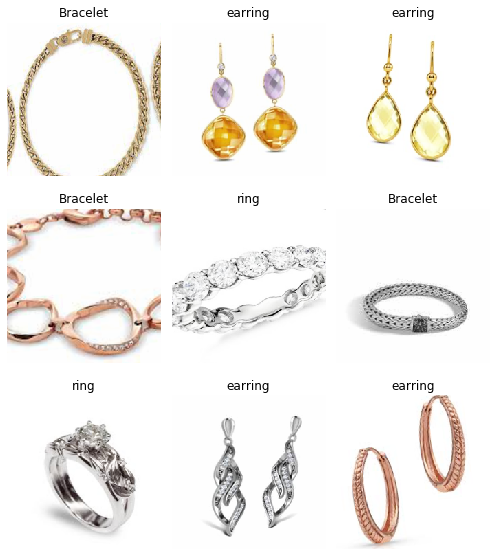

In [6]:
data.show_batch(rows=3, figsize=(7,8))


In [7]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [8]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,time
0,0.664971,0.487577,0.852753,01:01


In [0]:
learn.save('stage-1')

## Results

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

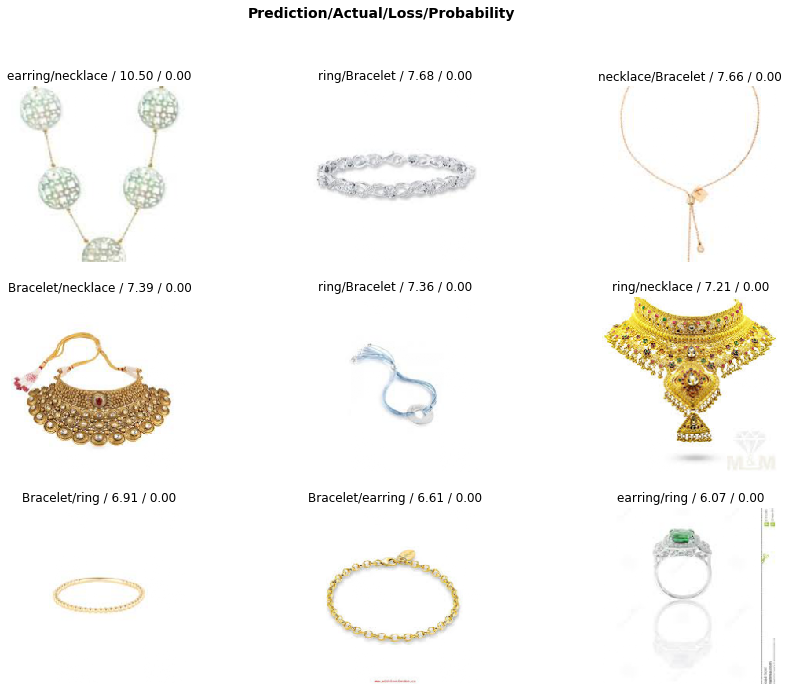

In [11]:

interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

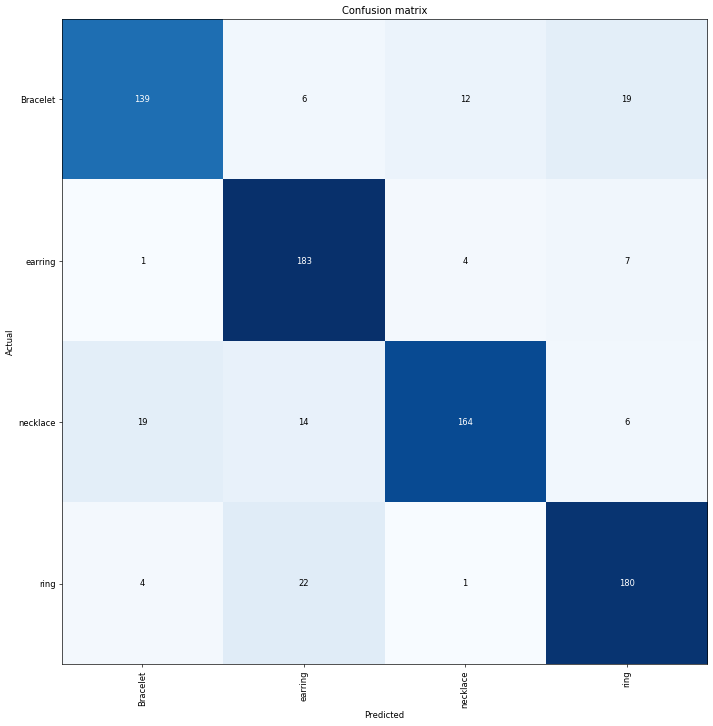

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [13]:
interp.most_confused(min_val = 2)

[('ring', 'earring', 22),
 ('Bracelet', 'ring', 19),
 ('necklace', 'Bracelet', 19),
 ('necklace', 'earring', 14),
 ('Bracelet', 'necklace', 12),
 ('earring', 'ring', 7),
 ('Bracelet', 'earring', 6),
 ('necklace', 'ring', 6),
 ('earring', 'necklace', 4),
 ('ring', 'Bracelet', 4)]

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.534811,0.308043,0.882202,01:28


In [16]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (3124 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earring,earring,earring,earring,earring
Path: /content/drive/My Drive/Jewls/Train;

Valid: LabelList (781 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earring,Bracelet,earring,necklace,necklace
Path: /content/drive/My Drive/Jewls/Train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNor

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


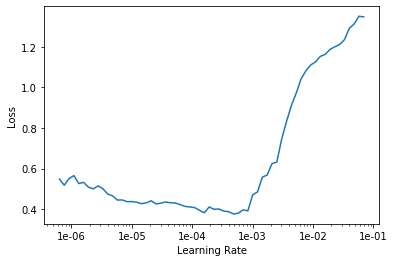

In [18]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.422600,0.274892,0.910371,01:27


In [0]:
learn.save('stage-2')

##Interpretation

In [21]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (3124 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earring,earring,earring,earring,earring
Path: /content/drive/My Drive/Jewls/Train;

Valid: LabelList (781 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earring,Bracelet,earring,necklace,necklace
Path: /content/drive/My Drive/Jewls/Train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNor

In [22]:
interp= ClassificationInterpretation.from_learner(learn)

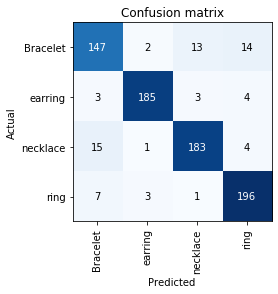

In [23]:
interp.plot_confusion_matrix()

#Putting your model in Production


In [24]:
data.classes

['Bracelet', 'earring', 'necklace', 'ring']

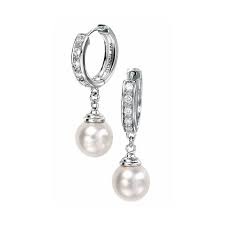

In [25]:
img_path = ('/content/drive/My Drive/Jewls/Test/earring/images - 2020-02-06T195819.166.jpeg')
img = open_image(img_path)
img

In [26]:
classes = ['Bracelet','earring','necklace','ring']
data2 = ImageDataBunch.single_from_classes(PATH,
                                           classes,
                                           ds_tfms = get_transforms(),
                                           size = 224).normalize(imagenet_stats)
learn = cnn_learner(data2,models.resnet152)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/Jewls/Train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/Jewls/Train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2

In [27]:
pred_class, pred_idx,outputs= learn.predict(img)
pred_class

Category ring